In [50]:
import sys
sys.path.append("..")

from dataset import ModisDataset
from model import Model, restore
import os
import torch
from visualizations import make_and_plot_predictions
import numpy as np

num_layers = 3
hidden_size = 32
region = "germany"
epoch = 98
model_name = f"LSTM_{region}_l={num_layers}_h={hidden_size}_e={epoch}.pth"
model_path=os.path.join("/data2/igarss2020/models/",model_name)
device = torch.device('cuda')

dataset = ModisDataset(region=region,
                            fold="test",
                            znormalize=True,
                            augment=False,
                            include_time=False,
                            smooth=None)

model = Model(input_size=1,
              hidden_size=hidden_size,
              num_layers=num_layers,
              output_size=1,
              device=device)

restore(model_path,model)

local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz


saving to /home/marc/projects/igarss2020_tex/img/example


(<Figure size 1008x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8204175898>,
       dtype=object))

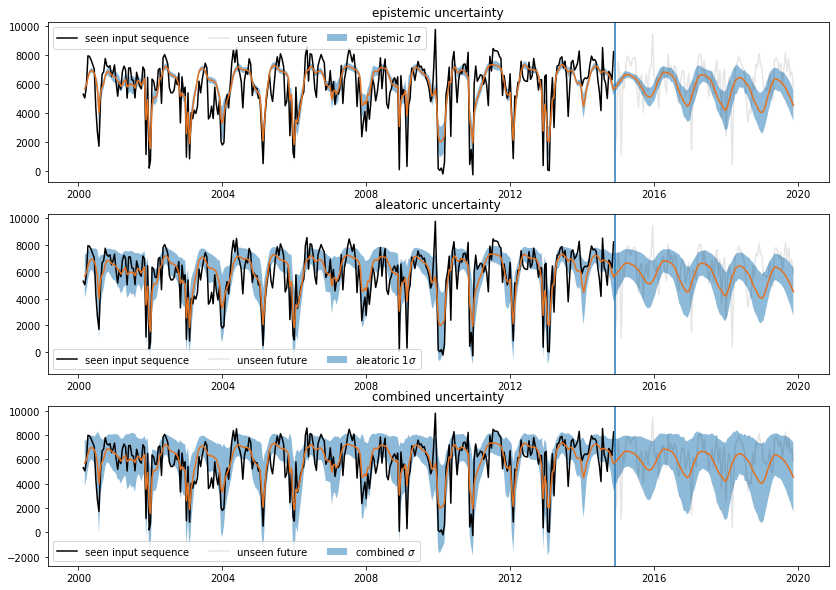

In [57]:
idx = 1
N_seen_points = 340
N_predictions=100

x = dataset.data[idx].astype(float)
date = dataset.date[idx].astype(np.datetime64)
make_and_plot_predictions(model, x, date, N_seen_points=N_seen_points, N_predictions=N_predictions,
                          device=device, store="/home/marc/projects/igarss2020_tex/img/example", meanstd=(dataset.mean,dataset.std))

In [56]:
date[N_seen_points]

numpy.datetime64('2014-12-03')